In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# define file locations
clin_trial_file = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_drug_file = os.path.join('raw_data', 'mouse_drug_data.csv')

In [3]:
# create clinincal trial dataframe
clin_trial_df = pd.read_csv(clin_trial_file)
clin_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# create mouse drug dataframe
mouse_drug_df = pd.read_csv(mouse_drug_file)

# remove mouse ID 'g989'. listed with 2 times with different drugs
mouse_drug_df = mouse_drug_df.drop_duplicates('Mouse ID', keep=False)

In [5]:
# merge mouse drug and clin trail dataframes
merged_df = pd.merge(clin_trial_df, mouse_drug_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
# group merged df by Drug and Timepoint
grouped_df = merged_df.groupby(['Drug','Timepoint'])

In [7]:
# find mean of tumor volumes by timepoint for each drug
tumor_vol_means = grouped_df['Tumor Volume (mm3)'].mean()
tumor_vol_means = tumor_vol_means.reset_index(drop=False)
tumor_vol_means = tumor_vol_means.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_vol_means.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [8]:
# find std error of tumor volumes by timepoint for each drug
tv_std_error = grouped_df['Tumor Volume (mm3)'].sem()
tv_std_error = tv_std_error.reset_index(drop=False)
tv_std_error = tv_std_error.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tv_std_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182


In [9]:
# prepare formating elements for plot
# store time points
timepoints = merged_df['Timepoint'].unique()

# store test drugs
test_drugs = merged_df['Drug'].unique()

# store colors
colors = ['red', 'green', 'blue', 'olive', 'orange', 'black', 'indigo', 'lightblue', 'deeppink', 'cyan']

# store colors
markers = ['o', 'v', 's', '*', 'h', 'd', '8', 'p', '8', '3']

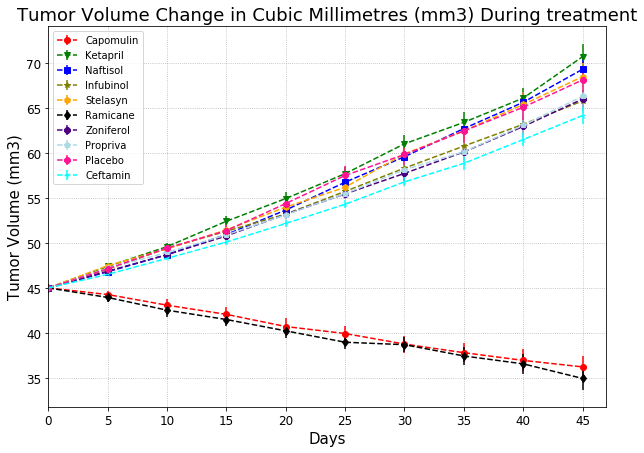

In [10]:
# plot tumor volume change on scatter plot
# zip plot format lists together
vol_change_plot_fmt = zip(test_drugs, colors, markers)

# adjust size of plot
fig = plt.figure(figsize=(10, 7))

for drug, color, marker in vol_change_plot_fmt:
    
    # get y values from tumor_vol_means df
    y_values = tumor_vol_means.loc[:, drug]
    
    # get standard error values from tv_std_error df
    standard_error = tv_std_error.loc[:, drug]
    
    # plot in errorbar plot
    plt.errorbar(timepoints, y_values, standard_error,
                 linestyle='--', marker=marker,
                 color=color, label=drug)

# add grid to plot
plt.grid(linestyle='dotted')

# adjust x ticks on plot
plt.xticks(timepoints)

# adjust x axis limit
plt.xlim(0, 47)

# add legend
plt.legend()

# change fontsize of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Tumor Volume Change in Cubic Millimetres (mm3) During treatment', fontsize=18)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)

plt.savefig('plots/Tumor_Volume_Change.png')
plt.show()

In [11]:
# find mean of Metastatic Sites by timepoint for each drug
met_site_means = grouped_df['Metastatic Sites'].mean()
met_site_means = met_site_means.reset_index(drop=False)
met_site_means = met_site_means.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
met_site_means.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [12]:
# find std error of tumor volumes by timepoint for each drug
ms_std_error = grouped_df['Metastatic Sites'].sem()
ms_std_error = ms_std_error.reset_index(drop=False)
ms_std_error = ms_std_error.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
ms_std_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378


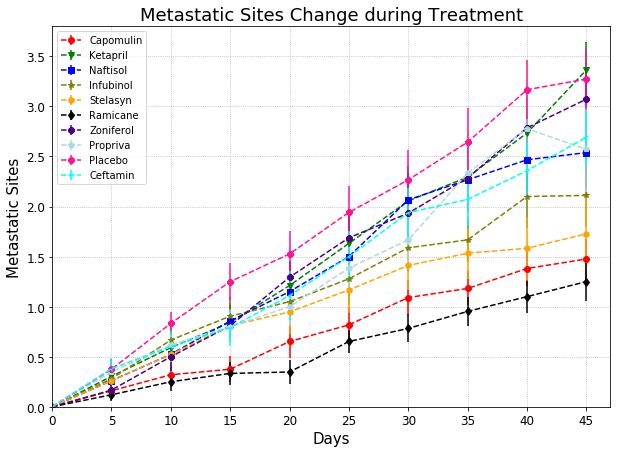

In [13]:
# plot tumor volume change on scatter plot
# zip plot format lists together
vol_change_plot_fmt = zip(test_drugs, colors, markers)

# adjust size of plot
fig = plt.figure(figsize=(10, 7))

for drug, color, marker in vol_change_plot_fmt:
    
    # get y values from tumor_vol_means df
    y_values = met_site_means.loc[:, drug]
    
    # get standard error values from tv_std_error df
    standard_error = ms_std_error.loc[:, drug]
    
    # plot in errorbar plot
    plt.errorbar(timepoints, y_values, standard_error,
                 linestyle='--', marker=marker,
                 color=color, label=drug)

# add grid to plot
plt.grid(linestyle='dotted')

# adjust x ticks on plot
plt.xticks(timepoints)

# adjust x and y axis limit
plt.ylim(0, 3.8)
plt.xlim(0, 47)

# add legend
plt.legend()

# change fontsize of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Metastatic Sites Change during Treatment', fontsize=18)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Metastatic Sites', fontsize=15)

plt.savefig('plots/Metastatic_Site_Change.png')
plt.show()

In [14]:
# find mouse count at each timepoint for each drug
survival_rate_df = grouped_df['Mouse ID'].count()
survival_rate_df = survival_rate_df.reset_index(drop=False)
begining_mouse_count = survival_rate_df.loc[survival_rate_df['Timepoint']==0]
begining_mouse_count = begining_mouse_count.rename(columns={
    'Mouse ID': 'Starting Mice Count'
})
survival_rate_df = pd.merge(survival_rate_df, begining_mouse_count.iloc[:,[0,2]], on='Drug', how='left')
survival_rate_df['Survival Rate (%)'] = round(survival_rate_df['Mouse ID'] / survival_rate_df['Starting Mice Count'], 2) * 100

survival_rate_df = survival_rate_df.pivot(index='Timepoint', columns='Drug', values='Survival Rate (%)')

survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,62.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,62.0,92.0,79.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,75.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,71.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,38.0,80.0,50.0,56.0


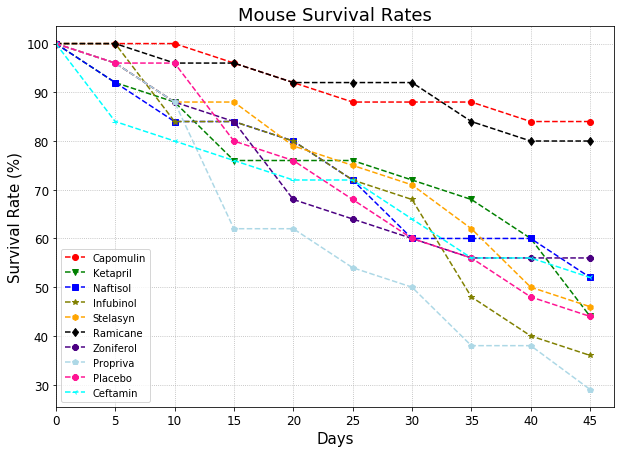

In [15]:
# plot mouse survival rate
# zip plot format lists together
vol_change_plot_fmt = zip(test_drugs, colors, markers)

# adjust size of plot
fig = plt.figure(figsize=(10, 7))

for drug, color, marker in vol_change_plot_fmt:
    
    y_values = survival_rate_df[drug]
    plt.plot(timepoints, y_values, 
             linestyle='--', color=color,
             marker=marker)

# add grid to plot
plt.grid(linestyle='dotted')

# adjust x ticks on plot
plt.xticks(timepoints)

# adjust x and y axis limit
plt.xlim(0, 47)

# add legend
plt.legend()

# change fontsize of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Mouse Survival Rates', fontsize=18)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Survival Rate (%)', fontsize=15)

plt.savefig('plots/Survival_Rates.png')
plt.show()

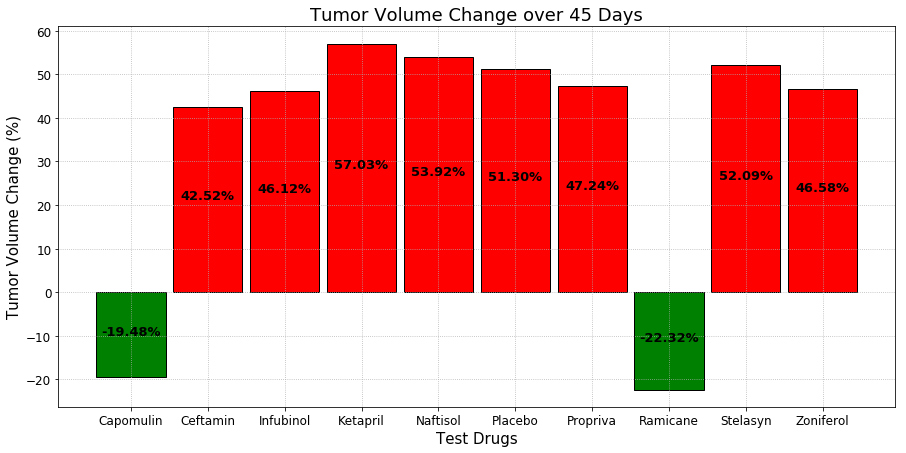

In [16]:
# plot total % tumor volume change
# define function to calculate percent
def percent_change(drug):
    
    change = tumor_vol_means.loc[45, drug] - tumor_vol_means.loc[0, drug]
    percent = change / tumor_vol_means.loc[0, drug] * 100
    return percent

# create empty list to hold calculated percent change
vol_change_percents = []
bar_colors = []
edge_colors = []

for drug_name in test_drugs:
    
    # calculate percent change
    change = percent_change(drug_name)
    
    # append to vol change percents list
    vol_change_percents.append(change)
    
    edge_colors.append('black')
    
    # add green to bar colors list if change is < 0
    if change < 0:
        
        bar_colors.append('g')
    
    # add red to bar colors list if change is >= 0
    else:
        
        bar_colors.append('r')

x_values = np.arange(0, 11, 1)

fig = plt.figure(figsize=(15, 7))

# add grid
plt.grid(linestyle='dotted')

# plot data percent volumne change on bar graph
plt.bar(test_drugs, vol_change_percents, width=.9, color=bar_colors, edgecolor=edge_colors)

# zip together positional arguments for text
on_bar_values = zip(test_drugs, vol_change_percents)

for drug, value in on_bar_values:
    
    if value >= 0:
        plt.text(drug, value/2, '{:.2%}'.format(value/100), 
                 horizontalalignment='center', color='black',
                 fontsize=13, weight='bold')
    else:
        plt.text(drug, value/2, '{:.2%}'.format(value/100),
                 horizontalalignment='center', color='black',
                 fontsize=13, weight='bold')

# change fontsize of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
        
# add title and axis labels
plt.title('Tumor Volume Change over 45 Days', fontsize=18)
plt.xlabel('Test Drugs', fontsize=15)
plt.ylabel('Tumor Volume Change (%)', fontsize=15)

plt.savefig('plots/Total_Tumor_Volume_Change.png')
plt.show()